In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

from keras.datasets import cifar10

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

170498071/170498071 [==============================] - 135s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


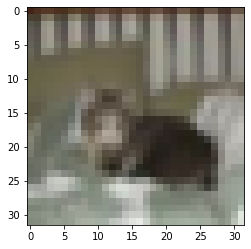

Label:  [3]


In [3]:
plt.imshow(x_train[150])
plt.show()

print("Label: ", y_train[150])

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.dtype

dtype('float32')

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [10]:
satır, sütun, katman = x_train.shape[1:]
print(satır, sütun, katman)

32 32 3


In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(satır, sütun, katman), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=10, batch_size=128, verbose=0)

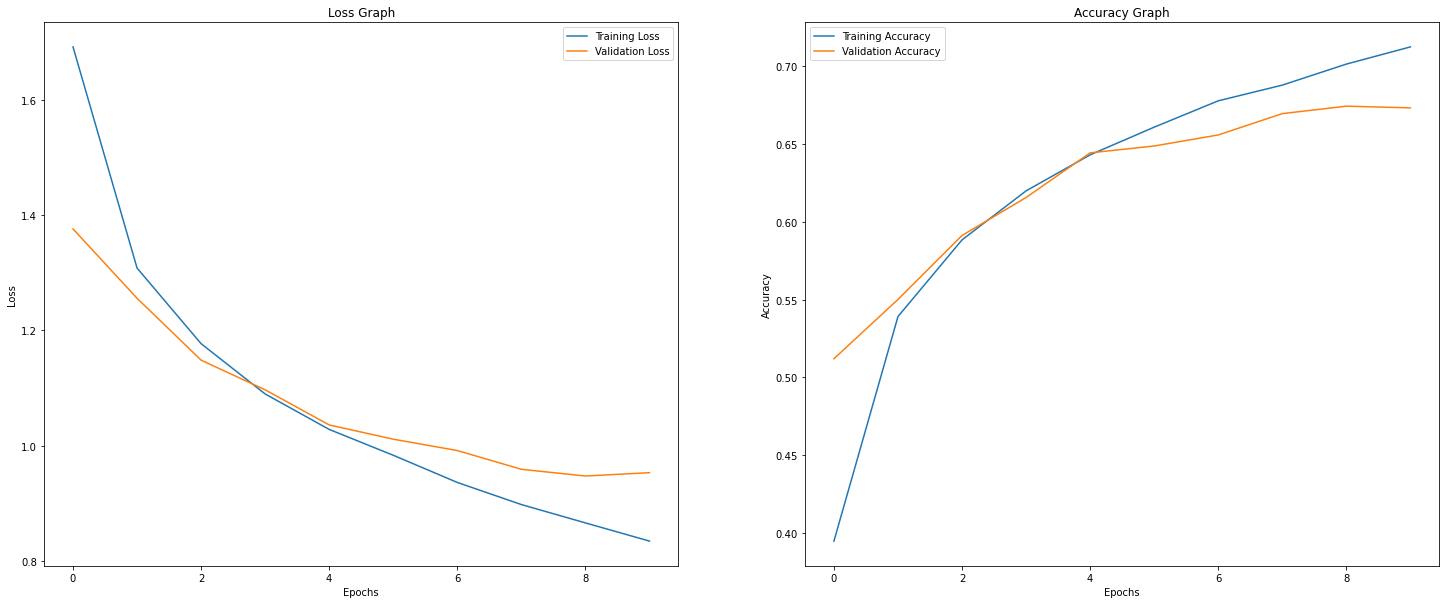

In [12]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show();

# Kfold

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [16]:
satır, sütun, katman = x_train.shape[1:]

def modelkur():
    model = Sequential()

    model.add(Conv2D(32,kernel_size=(3,3),input_shape=(satır, sütun, katman), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32,kernel_size=(3,3),activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(64,activation="relu"))
    model.add(Dense(10,activation="softmax"))

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

    return model


all_train_loss = []
all_train_acc = []
all_test_loss = []
all_test_acc = []
all_val_loss = []
all_val_acc = []

kf = KFold(n_splits=5,shuffle=True,random_state=42)

for i,j in kf.split(x_train,y_train):
    x_train_fold = x_train[i]
    y_train_fold = y_train[i]
    x_val_fold = x_train[j]
    y_val_fold = y_train[j]
    
    model = modelkur()
    result = model.fit(x_train, y_train, validation_data=(x_val_fold,y_val_fold), epochs=10, batch_size=1024, verbose=0)
    
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    all_train_loss.append(train_loss)
    all_train_acc.append(train_acc)
    
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    all_val_loss.append(val_loss)
    all_val_acc.append(val_acc)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    all_test_loss.append(test_loss)
    all_test_acc.append(test_acc)

In [17]:
print("Ortalama Training Loss: ", np.mean(all_train_loss))
print("Ortalama Training Accuracy: ", np.mean(all_train_acc))
print("----------------------------------------------------")
print("Ortalama Val Loss: ", np.mean(all_val_loss))
print("Ortalama Val Accuracy: ", np.mean(all_val_acc))
print("----------------------------------------------------")
print("Ortalama Test Loss: ", np.mean(all_test_loss))
print("Ortalama Test Accuracy: ", np.mean(all_test_acc))

Ortalama Training Loss:  1.1119236707687379
Ortalama Training Accuracy:  0.6130249977111817
----------------------------------------------------
Ortalama Val Loss:  1.1123186588287353
Ortalama Val Accuracy:  0.6144400000572204
----------------------------------------------------
Ortalama Test Loss:  1.1455037593841553
Ortalama Test Accuracy:  0.5991400003433227
